In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# create function for calculating number of users given inputs
def user_growth(user_base, viral_coeff, cycle_time, time_elapsed):
    output = user_base*((viral_coeff ** ((time_elapsed/cycle_time) + 1) - 1)/(viral_coeff - 1))
    return output

In [58]:
# stipulate initial parameters
u0 = 1
k = 2
c = 10

# specify time elapsed
t = 20
user_growth(u0, k, c, t)

7.0

In [5]:
# create array for x-values (time)
t = np.arange(0, 100, 1)
# t

In [6]:
# create arrays for several cases
users_k0p5_c10 = []
users_k1_c10 = []
users_k2_c10 = []
users_k2_c5 = []
users_k2_c15 = []
for i in t:
     users_k0p5_c10.append(user_growth(1, 0.5, 10, i))
     users_k1_c10.append(user_growth(1, 1.001, 10, i))    
     users_k2_c10.append(user_growth(1, 2, 10, i))
     users_k2_c5.append(user_growth(1, 2, 5, i))
     users_k2_c15.append(user_growth(1, 2, 15, i))

In [7]:
# create dataframe with data
viral_growth = pd.DataFrame({'time (days)': t,
                             'k0.5, c10': users_k0p5_c10,
                             'k1, c10': users_k1_c10,
                             'k2, c10': users_k2_c10,
                             'k2, c5': users_k2_c5,
                             'k2, c15': users_k2_c15})

# viral_growth.style.hide_index()

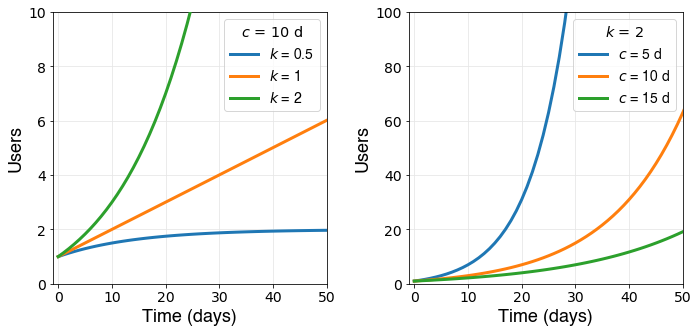

In [37]:
# plot result
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# stipulate data of interest
x = viral_growth['time (days)']
y1 = viral_growth['k0.5, c10']
y2 = viral_growth['k1, c10']
y3 = viral_growth['k2, c10']
y4 = viral_growth['k2, c5']
y5 = viral_growth['k2, c15']

# plot k variation
axes[0].plot(x, y1, linewidth=3, zorder= 1, label='$k$ = 0.5')
axes[0].plot(x, y2, linewidth=3, zorder= 3, label='$k$ = 1')
axes[0].plot(x, y3, linewidth=3, zorder= 5, label='$k$ = 2')

# set limits
axes[0].set_xlim(-1, 50)
axes[0].set_ylim(0, 10)
axes[0].set_yticks(np.arange(0, 11, 2))

# set legend, plot properties
l = axes[0].legend(prop={'size': 14}, title='$c$ = 10 d')
plt.setp(l.texts, family='Helvetica')
plt.setp(l.get_title(),fontsize='x-large')

axes[0].set_xlabel('Time (days)', fontsize=18, fontname='Helvetica')
axes[0].set_ylabel('Users', fontsize=18, fontname='Helvetica')
axes[0].tick_params(axis = 'x', labelsize = 14)
axes[0].tick_params(axis = 'y', labelsize = 14)
axes[0].grid(color=(.9, .9, .9)); axes[0].set_axisbelow(True)

# plot c variation
axes[1].plot(x, y4, linewidth=3, zorder= 1, label='$c$ = 5 d')
axes[1].plot(x, y3, linewidth=3, zorder= 3, label='$c$ = 10 d')
axes[1].plot(x, y5, linewidth=3, zorder= 5, label='$c$ = 15 d')

# set limits
axes[1].set_xlim(-1, 50)
axes[1].set_ylim(0, 100)
axes[1].set_yticks(np.arange(0, 101, 20))

# set legend, plot properties
l2 = axes[1].legend(prop={'size': 14}, title='$k$ = 2')
plt.setp(l2.texts, family='Helvetica')
plt.setp(l2.get_title(),fontsize='x-large')

axes[1].set_xlabel('Time (days)', fontsize=18, fontname='Helvetica')
axes[1].set_ylabel('Users', fontsize=18, fontname='Helvetica')
axes[1].tick_params(axis = 'x', labelsize = 14)
axes[1].tick_params(axis = 'y', labelsize = 14)
axes[1].grid(color=(.9, .9, .9)); axes[1].set_axisbelow(True)

# save, display plot
plt.subplots_adjust(wspace=0.3, left=0.075, right=0.95)
plt.savefig('./Images/viral_growth_k_c.png', dpi=400)
plt.show()

In [57]:
# create active user definition table
active_user_defs = pd.DataFrame({'Company': ['Facebook', 'Twitter', 'Uber', 'Amazon', 'Square'],
#                                  'Revenue source': ['Advertising', 'Advertising', 'Commissions', 'Commissions', 'Commissions'],
                                 'Active user action': ['Liking, commenting, messaging, etc.', 
                                            'Logging in',
                                            'Receiving a ride or meal delivery',
                                            'Making a purchase',
                                            'Sending or receiving money'],
                                 'Time interval': ['Daily', 'Daily', 'Monthly', 'Yearly', 'Monthly'],
                                 'Count (millions, 2020)': ['1,734', '166', '111', '310', '24']})
active_user_defs.style.hide_index()

Company,Active user action,Time interval,"Count (millions, 2020)"
Facebook,"Liking, commenting, messaging, etc.",Daily,"1,734"
Twitter,Logging in,Daily,166
Uber,Receiving a ride or meal delivery,Monthly,111
Amazon,Making a purchase,Yearly,310
Square,Sending or receiving money,Monthly,24


In [143]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [197]:
# create x-axis (time, days)
x = np.arange(0,1000,1)

# create viral coefficient data
min_k = 0.5
max_k = 2
width = 250
center = 500
viral_coeff = (max_k - min_k)*np.exp(-((x - center) / width)**2) + min_k

# create cycle time data
decay_rate = 0.005
end_cycle_time = 5
cycle_time = (10 - end_cycle_time)*np.exp(-x*decay_rate) + end_cycle_time

# create retention data
decay_rate = 0.1
end_retention = 0.33
retention = (1 - end_retention)*np.exp(-x*decay_rate) + end_retention

# create retention rate change data
decay_rate = 0.005
end_cycle_time = 0.5
retention_rate =  -end_cycle_time*np.exp(-x*decay_rate-0.5) + end_cycle_time

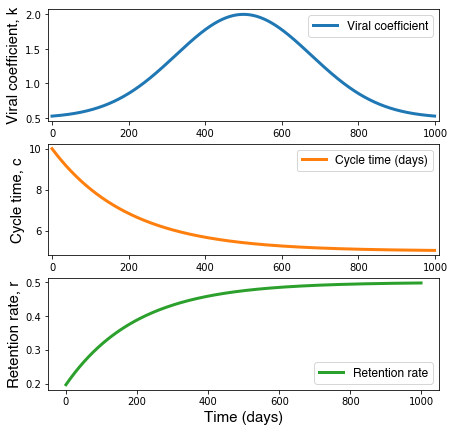

In [198]:
# create plots illustrating changes in viral coefficient over time

fig, axes = plt.subplots(3, 1, figsize = (7,7))
axes[0].plot(x, viral_coeff, linewidth=3, c=colors[0], label='Viral coefficient')
axes[0].legend(prop={'size': 12, 'family':'Helvetica'})
axes[0].set_xlim(-10,1010)
axes[0].set_ylabel('Viral coefficient, k', size=15, fontname='Helvetica', fontweight='bold')

axes[1].plot(x, cycle_time, linewidth=3, c=colors[1], label='Cycle time (days)')
axes[1].legend(prop={'size': 12, 'family':'Helvetica'})
axes[1].set_xlim(-10,1010)
axes[1].set_ylabel('Cycle time, c', size=15, fontname='Helvetica', fontweight='bold')

axes[2].plot(x, retention_rate, linewidth=3, c=colors[2], label='Retention rate')
axes[2].legend(prop={'size': 12, 'family':'Helvetica'})
# axes[2].set_xlim(-1,101)
axes[1].set_xlim(-10,1010)
axes[2].set_ylabel('Retention rate, r', size=15, fontname='Helvetica', fontweight='bold')

plt.xlabel('Time (days)', fontsize = 15, fontname = 'Helvetica', fontweight = 'bold')

plt.show()

In [201]:
# gather inputs for user growth

growth_inputs = pd.DataFrame({'Viral coefficient': viral_coeff, 
                              'Cycle time': cycle_time, 
                              'Retention rate': retention_rate})
growth_inputs

,Viral coefficient,Cycle time,Retention rate
0,0.527473,10.000000,0.196735
1,0.527916,9.975062,0.198247
2,0.528365,9.950249,0.199752
3,0.528820,9.925560,0.201250
4,0.529282,9.900993,0.202740
...,...,...,...
995,0.529750,5.034543,0.497905
996,0.529282,5.034370,0.497915
997,0.528820,5.034199,0.497926
998,0.528365,5.034028,0.497936


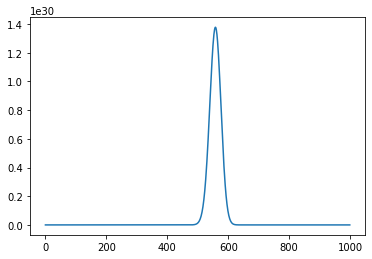

In [216]:
# create user growth accounting for specified changes to k, c, and r

# user_growth(user_base, viral_coeff, cycle_time, time_elapsed)

# user_growth(np.ones(1000), growth_inputs['Viral coefficient'], growth_inputs['Cycle time'], growth_inputs.index)

k = growth_inputs['Viral coefficient']
c = growth_inputs['Cycle time']
t = growth_inputs.index


# this equation doesn't work with variable k and c
user_growth_1 = 1*(k ** (t/c + 1) - 1) / (k - 1)
user_growth_1

user_growth_2 = []
for time in t:
    new_users = old_users + 

plt.plot(user_growth)
# plt.ylim(0,100)
# plt.show()

In [9]:
# create arrays for several cases

# user_growth(user_base, viral_coeff, cycle_time, time_elapsed)

users_k2_c5 = []
users_k2_c10 = []
users_k2_c15 = []
for i in t:
     users_k2_c5.append(user_growth(1, 2, 5, i))
     users_k2_c10.append(user_growth(1, 2, 10, i))    
     users_k2_c15.append(user_growth(1, 2, 15, i))

In [10]:
# create dataframe with data
viral_growth_3 = pd.DataFrame({'time (days)': t,
                             'k2, c5': users_k2_c5,
                             'k2, c10': users_k2_c10,
                             'k2, c15': users_k2_c15})

# viral_growth.style.hide_index()

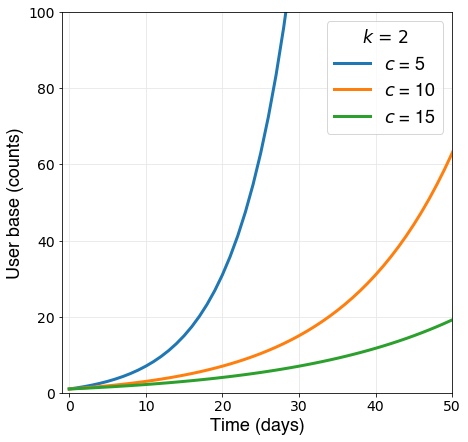

In [11]:
# plot result
fig, ax = plt.subplots(1, 1, figsize=(7,7))

x = viral_growth_3['time (days)']
y1 = viral_growth_3['k2, c5']
y2 = viral_growth_3['k2, c10']
y3 = viral_growth_3['k2, c15']

plt.plot(x, y1, linewidth=3, zorder= 1, label='$c$ = 5')#, $c$ = 10 d')
plt.plot(x, y2, linewidth=3, zorder= 3, label='$c$ = 10')#,    $c$ = 10 d')
plt.plot(x, y3, linewidth=3, zorder= 5, label='$c$ = 15')#,    $c$ = 10 d')

plt.xlim(-1, 50)
plt.ylim(0, 100)
plt.yticks(np.arange(0, 101, 20))
l = plt.legend(prop={'size': 18}, title='$k$ = 2')
plt.setp(l.texts, family='Helvetica')
plt.setp(l.get_title(),fontsize='xx-large')

plt.xlabel('Time (days)', fontsize = 18, fontname = 'Helvetica')
plt.ylabel('User base (counts)', fontsize = 18, fontname = 'Helvetica')
# plt.title('Title', fontsize = 20, fontname = 'Helvetica')
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.grid(color=(.9, .9, .9)); ax.set_axisbelow(True)
plt.show()

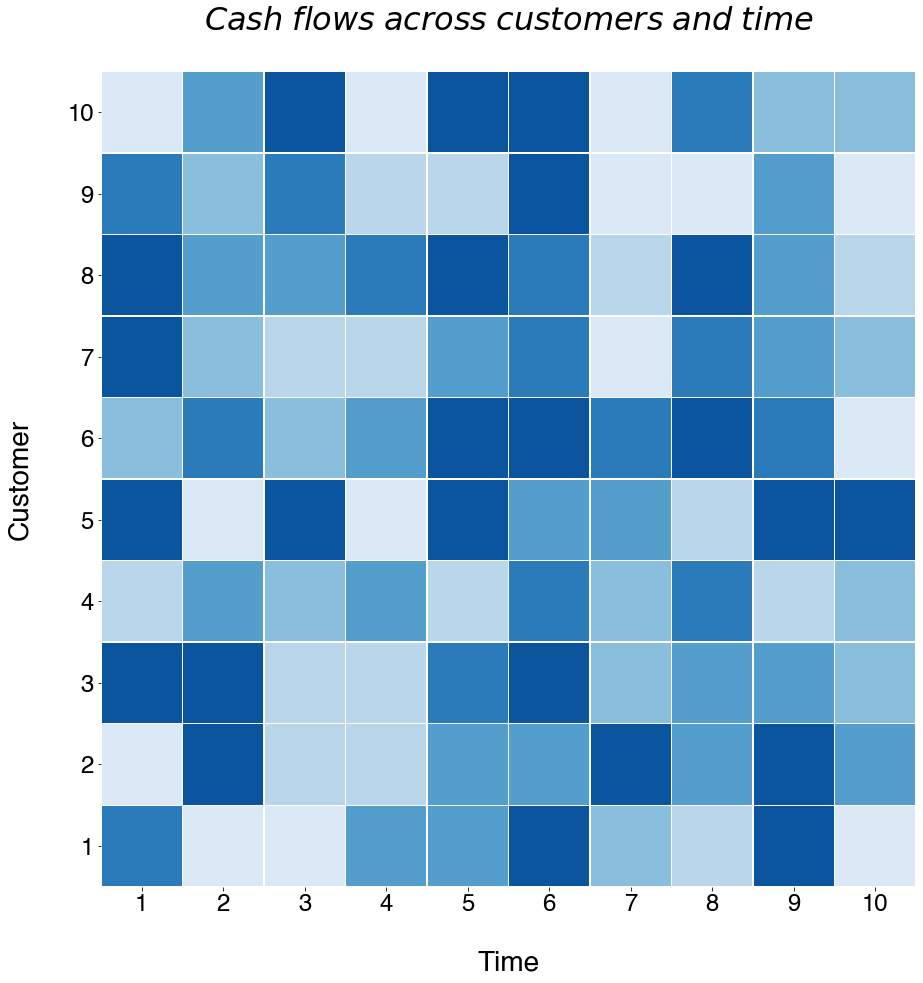

In [12]:
# create heatmap illustrating double sum of cash flows over customers and time
import seaborn as sns
import numpy.random as npr

fig, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(2, 0, n=2, as_cmap=True)
ax = sns.heatmap(npr.rand(11, 11), 
                 cmap=sns.color_palette("Blues"), 
                 annot_kws={"fontsize":18},
                 square=True, 
                 linewidths=.5, 
                 cbar=False)
plt.setp(ax.get_xticklabels(), rotation=0, ha='center', fontsize=24, fontname='Helvetica')
plt.setp(ax.get_yticklabels(), rotation=0, ha='right', fontsize=24, fontname='Helvetica')
plt.xlabel('\nTime', fontsize=28, fontname='Helvetica')
plt.ylabel('Customer\n', fontsize=28, fontname='Helvetica')
plt.xlim(1,11)
plt.ylim(1,11)
# ax.invert_yaxis()
ax.set_facecolor([1,1,1])
ax.set_title('$Cash$ $flows$ $across$ $customers$ $and$ $time$\n', fontsize=32, fontname='Helvetica')
plt.show()

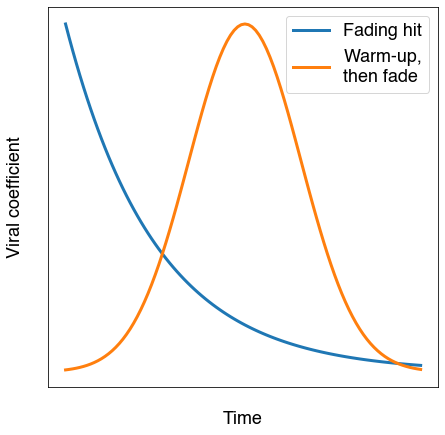

In [212]:
# create plots illustrating changes in viral coefficient over time
fig, axes = plt.subplots(1, 1, figsize = (7,7))
x = np.arange(0,100,1)
y1 = 2*np.exp(-x/25)
y2 = (2/1)*np.exp(-0.1*((x-50)/7)**2)
plt.plot(x, y1, linewidth=3, label='Fading hit')
plt.plot(x, y2, linewidth=3, label='Warm-up,\nthen fade')
plt.xlabel('\nTime', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylabel('Viral coefficient\n', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes.get_xaxis().set_ticks([])
axes.get_yaxis().set_ticks([])
l = plt.legend(prop={'size': 18})
plt.setp(l.texts, family='Helvetica')
plt.show()

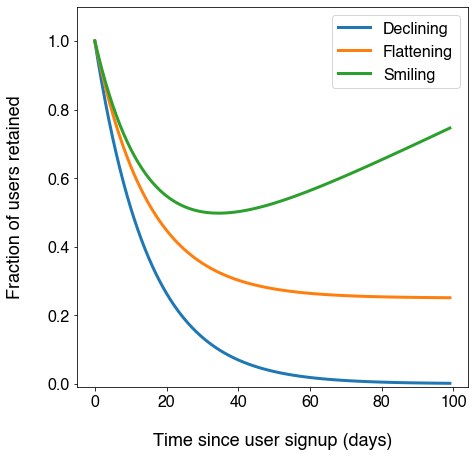

In [241]:
# create retention curve plots
plt.rcParams["font.family"] = "Helvetica"
fig, ax = plt.subplots(1, 1, figsize = (7,7))
x = np.arange(0,100,1)
y1 = 1*np.exp(-x/15)
y2 = 0.75*np.exp(-x/15) + 0.25
y3 = 0.75*np.exp(-x/15) + 0.25 + 0.005*x
plt.plot(x, y1, linewidth=3, label='Declining')
plt.plot(x, y2, linewidth=3, label='Flattening')
plt.plot(x, y3, linewidth=3, label='Smiling')
plt.xlabel('\nTime since user signup (days)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylabel('Fraction of users retained\n', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylim(-0.01,1.1)
# ax.get_xaxis().set_ticks([0, 28, 56, 84])
ax.tick_params(axis='both', which='major', labelsize=16)
l = plt.legend(prop={'size': 16})
plt.setp(l.texts, family='Helvetica')
plt.show()

In [260]:
# y4 = (y1 + y2 + y3)/3
y4 = np.zeros(100)
y4[:60] = (y1[:60] + y2[:60] + y3)/3
y4[60:80] = (y1[60:80] + y2[60:80])/2
y4[80:] = y1[80:]
# y4

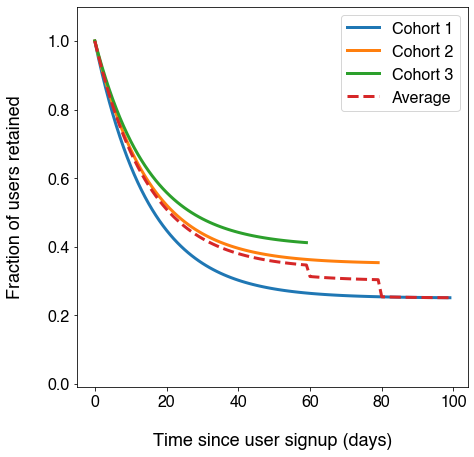

In [261]:
# create improving retention with cohort plots
plt.rcParams["font.family"] = "Helvetica"
fig, ax = plt.subplots(1, 1, figsize = (7,7))
x = np.arange(0,100,1)
y1 = 0.75*np.exp(-x/15) + 0.25
y2 = 0.65*np.exp(-x[:80]/15) + 0.35
y3 = 0.60*np.exp(-x[:60]/15) + 0.40
plt.plot(x, y1, linewidth=3, label='Cohort 1')
plt.plot(x[:80], y2, linewidth=3, label='Cohort 2')
plt.plot(x[:60], y3, linewidth=3, label='Cohort 3')
plt.plot(x, y4, '--', linewidth=3, label='Average')
plt.xlabel('\nTime since user signup (days)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylabel('Fraction of users retained\n', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylim(-0.01,1.1)
ax.tick_params(axis='both', which='major', labelsize=16)
l = plt.legend(prop={'size': 16})
plt.setp(l.texts, family='Helvetica')
plt.show()

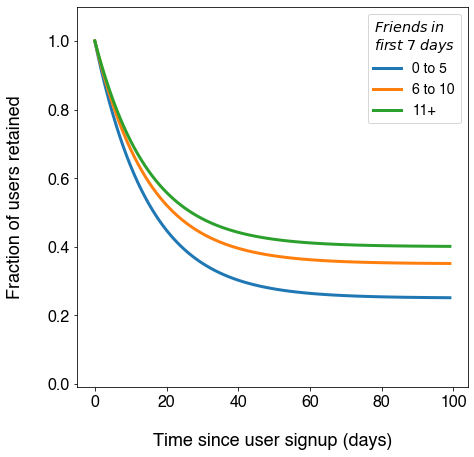

In [273]:
# create improving retention with increasing friends plots
plt.rcParams["font.family"] = "Helvetica"
fig, ax = plt.subplots(1, 1, figsize = (7,7))
x = np.arange(0,100,1)
y1 = 0.75*np.exp(-x/15) + 0.25
y2 = 0.65*np.exp(-x/15) + 0.35
y3 = 0.60*np.exp(-x/15) + 0.40
plt.plot(x, y1, linewidth=3, label='0 to 5')
plt.plot(x, y2, linewidth=3, label='6 to 10')
plt.plot(x, y3, linewidth=3, label='11+')
plt.xlabel('\nTime since user signup (days)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylabel('Fraction of users retained\n', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylim(-0.01,1.1)
ax.tick_params(axis='both', which='major', labelsize=16)
l = plt.legend(title='$Friends$ $in$ \n$first$ $7$ $days$', prop={'size': 14})
plt.setp(l.get_title(),fontsize='x-large', fontname='Helvetica')
plt.setp(l.texts, family='Helvetica')
plt.show()